In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[ : , 0:-1 ].values
y = dataset.iloc[ : , -1 ].values

# Encoding the categorical variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('Encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Multiple Linear Machine Learning Model on the Training Set

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the test set results

In [41]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis = 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Calculating the difference between y_pred and y_test

In [42]:
y_frame= np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis = 1)
y_frame= pd.DataFrame(y_frame)
y_frame=y_frame.rename(columns={0:'y_pred',1:'y_test'})
y_frame['Differences']=y_frame['y_pred']-y_frame['y_test']
pd.set_option('display.precision',0)


## Statistical significance of the model

In [43]:
import statsmodels.api as sm
new_X= sm.add_constant(X)
updated_X = np.array(new_X, dtype=float)

regressor_OLS = sm.OLS(y, updated_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.34e-27
Time:                        20:42:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x1          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x2          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x3          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
x4             0.8060      0.046     17.369      0.000       0.712       0.900
x5            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x6             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.35e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Removing the redundant dummy variable

In [44]:
## index0= constant column
## index1= 1st dummy state
## index2= 2nd dummy state
## index3= R&D spend
## index4= Admin spend
## index5= Marketing spend

new_X= updated_X[ : , [0,2,3,4,5,6] ]
opt_X= new_X[ : , [0,1,2,3,4,5] ]


regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.34e-27
Time:                        20:42:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training the regression model after Removing the redundant dummy variable

Building the optimal model using backward elimiation 

In [45]:
opt_X= new_X[ : , [0,1,3,4,5] ]


regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           8.49e-29
Time:                        20:42:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
opt_X= new_X[ : , [0,3,4,5] ]


regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           4.53e-30
Time:                        20:42:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
opt_X= new_X[ : , [0,3,5] ]


regressor_OLS = sm.OLS(y, opt_X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.16e-31
Time:                        20:42:05   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The final regression equation

Profit = 4,698 + 0.7966 × R & D Spend + 0.0299 × Marketing Spend

Checking the Assumption

In [48]:
import seaborn as sns
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50,50,50,50
mean,73722,121345,211025,112013
std,45902,28018,122290,40306
min,0,51283,0,14681
25%,39936,103731,129300,90139
50%,73051,122700,212716,107978
75%,101603,144842,299469,139766
max,165349,182646,471784,192262


D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

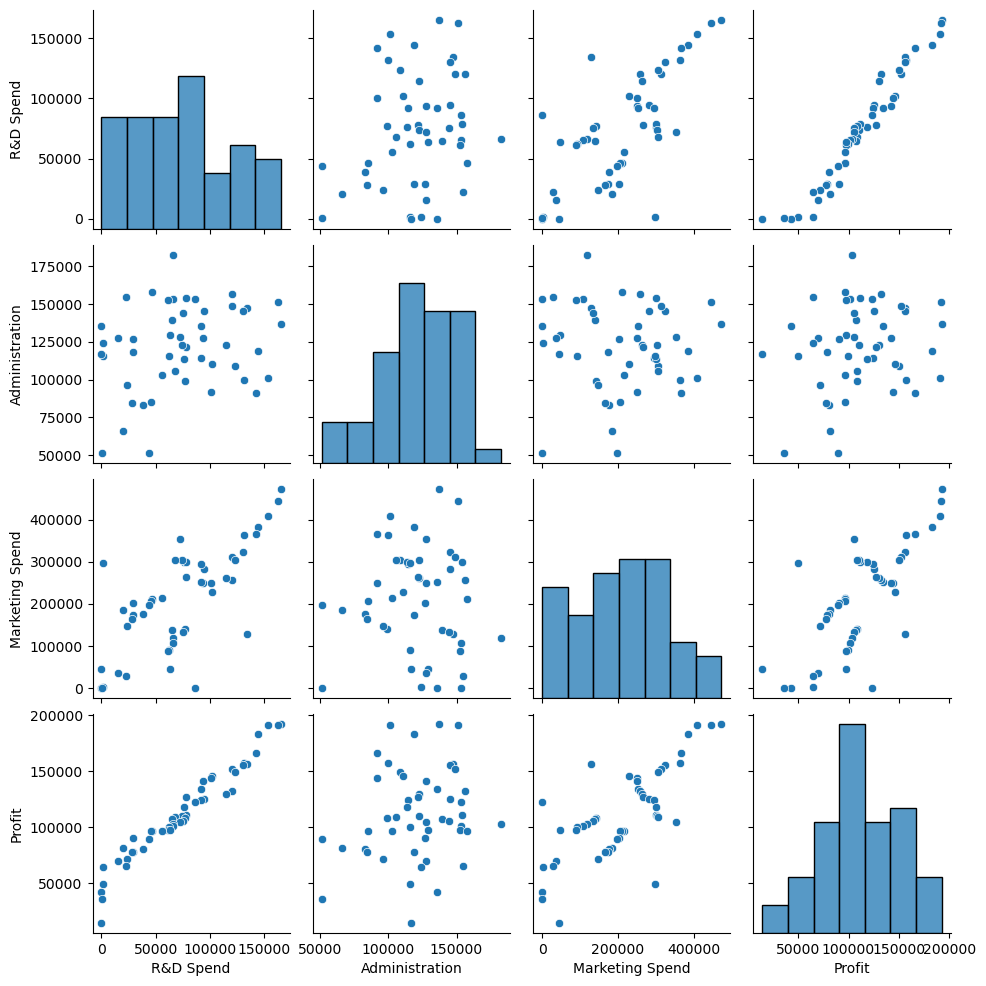

In [49]:
p= sns.pairplot(dataset)

Linearity

D:\plant_pathology\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


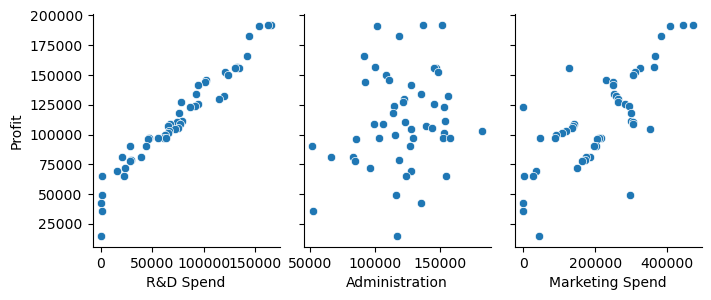

In [50]:
p= sns.pairplot(dataset, x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars='Profit', size=3, aspect=0.8)

Check for Homoscedasticity

In [51]:
regressor_homo = LinearRegression()
regressor_homo.fit(X, y)

LinearRegression()

In [52]:
y_predict_homo=regressor_homo.predict(X)


In [53]:
residual=y-y_predict_homo


(-20000.0, 15000.0)

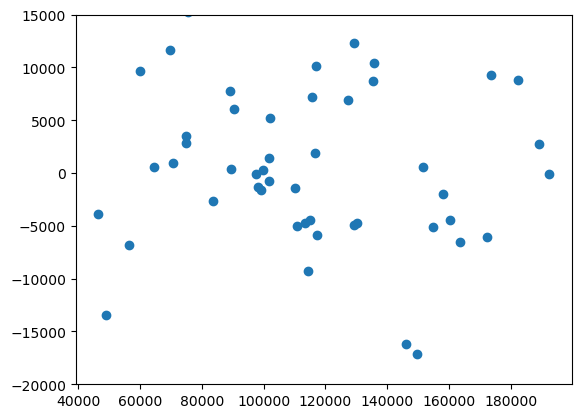

In [54]:
plt.scatter(y_predict_homo, residual)
plt.ylim(-20000,15000)

Check for Normality of error terms/residuals

D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


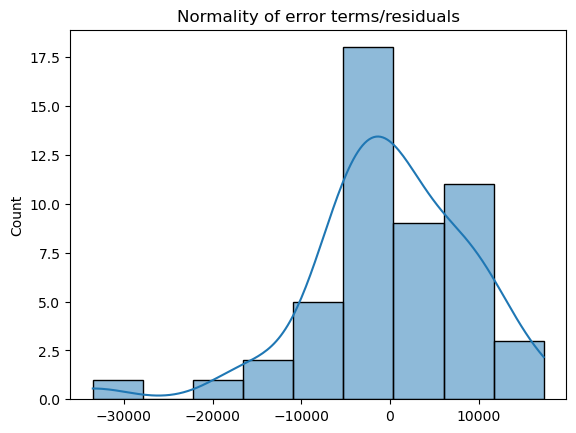

In [55]:
p = sns.histplot(residual, kde=True)
p = plt.title('Normality of error terms/residuals')

In [73]:
dataset = pd.read_csv("50_Startups.csv")
dataset
Dataset1= dataset[['R&D Spend','Administration','Marketing Spend','Profit']]
Dataset1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349,136898,471784,192262
1,162598,151378,443899,191792
2,153442,101146,407935,191050
3,144372,118672,383200,182902
4,142107,91392,366168,166188
5,131877,99815,362861,156991
6,134615,147199,127717,156123
7,130298,145530,323877,155753
8,120543,148719,311613,152212
9,123335,108679,304982,149760


Checking for Multicollinearity

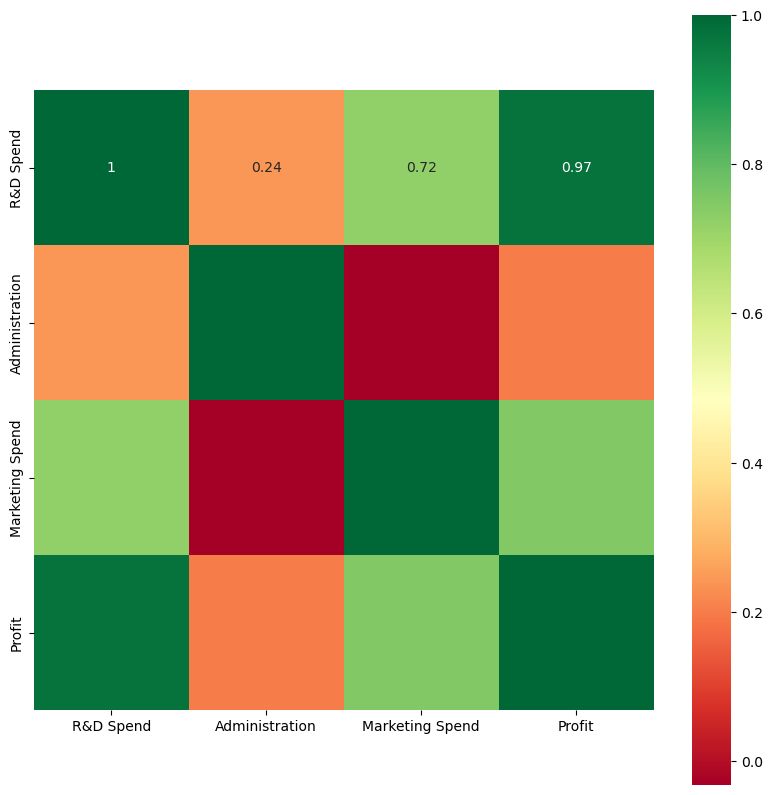

In [75]:
plt.figure(figsize=(10,10))
p = sns.heatmap(Dataset1.corr(), annot=True, cmap='RdYlGn', square=True)